In [153]:
import pandas as pd
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, precision_recall_fscore_support, roc_curve, classification_report
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import numpy as np

In [154]:
df = pd.read_csv('E:/Courses/Ragib/Log-Reg-Case-Study.csv')

In [155]:
df.head()

,Customer_ID,Credit_Amount,Purpose_Credit_Taken,Duration_in_Months,Status_Checking_Accnt,Credit_History,Job_Status,Years_At_Present_Employment,Marital_Status_Gender,Other_Debtors_Guarantors,Current_Address_Yrs,Age,Housing,Num_Credits,Num_Dependents,Foreign_Worker,Default_On_Payment
0,C15001,3939,P40,11,S11,A34,A172,E73,A93,A101,2,40,A152,2,2,A201,0
1,C15002,1795,P43,18,S12,A34,A172,E75,A92,A103,4,48,A151,2,1,A201,0
2,C15003,6143,P41,48,S11,A34,A172,E75,A92,A101,4,58,A153,2,1,A201,1
3,C15004,2675,P43,22,S14,A32,A173,E75,A93,A101,4,40,A152,1,1,A201,0
4,C15005,12389,P40,36,S12,A32,NaN,E73,A93,A101,4,37,A153,1,1,A201,1


In [156]:
data = df

In [157]:
arr = data.values
arr

array([['C15001', 3939, 'P40', ..., 2, 'A201', 0],
       ['C15002', 1795, 'P43', ..., 1, 'A201', 0],
       ['C15003', 6143, 'P41', ..., 1, 'A201', 1],
       ...,
       ['C19998', 3595, 'P43', ..., 1, 'A201', 0],
       ['C19999', 2622, 'P49', ..., 1, 'A201', 0],
       ['C20000', 2142, 'P49', ..., 1, 'A201', 0]], dtype=object)

In [158]:
X = data.iloc[:, [1, 10, 11, 13]]

In [7]:
X.head()

,Credit_Amount,Current_Address_Yrs,Age,Num_Credits
0,3939,2,40,2
1,1795,4,48,2
2,6143,4,58,2
3,2675,4,40,1
4,12389,4,37,1


In [159]:
Y = data.iloc[:, 16]

In [160]:
Y.head()

0    0
1    0
2    1
3    0
4    1
Name: Default_On_Payment, dtype: int64

In [161]:
model = LogisticRegression()
model.fit(X, Y)

LogisticRegression()

In [162]:
pred = model.predict(X)

In [163]:
print(pred)
print(Y)

[0 0 0 ... 0 0 0]
0       0
1       0
2       1
3       0
4       1
       ..
4995    0
4996    0
4997    0
4998    0
4999    0
Name: Default_On_Payment, Length: 5000, dtype: int64


In [164]:
cm_df = pd.DataFrame(confusion_matrix(Y, pred).T, index=model.classes_, columns=model.classes_)
cm_df

,0,1
0,3450,1385
1,55,110


In [165]:
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'
print(cm_df)
print(classification_report(Y, pred))
model.score(X, Y)

True          0     1
Predicted            
0          3450  1385
1            55   110
              precision    recall  f1-score   support

           0       0.71      0.98      0.83      3505
           1       0.67      0.07      0.13      1495

    accuracy                           0.71      5000
   macro avg       0.69      0.53      0.48      5000
weighted avg       0.70      0.71      0.62      5000



0.712

In [166]:
X1 = df.iloc[:, :-1]
Y1 = df.iloc[:, -1]

In [167]:
x_train, x_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.30, random_state=4)

In [168]:
print(min(df.Age))
print(max(df.Age))

19
85


In [169]:
df.loc[df['Age']>75,'Age'] = 75

In [170]:
print(min(df.Age))
print(max(df.Age))

19
75


In [171]:
df.isnull().sum()

Customer_ID                     0
Credit_Amount                   0
Purpose_Credit_Taken            0
Duration_in_Months              0
Status_Checking_Accnt           0
Credit_History                  0
Job_Status                     12
Years_At_Present_Employment     0
Marital_Status_Gender           0
Other_Debtors_Guarantors        0
Current_Address_Yrs             0
Age                             0
Housing                         9
Num_Credits                     0
Num_Dependents                  0
Foreign_Worker                  0
Default_On_Payment              0
dtype: int64

In [172]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3500, 16)
(1500, 16)
(3500,)
(1500,)


In [173]:
print(df.Age.describe())

count    5000.000000
mean       35.548800
std        11.378907
min        19.000000
25%        27.000000
50%        33.000000
75%        42.000000
max        75.000000
Name: Age, dtype: float64


In [174]:
# A quantile is the value below which a fraction of observations in a group falls. For example, a prediction for quantile 0.9 should over-predict 90% of the times.
print(df.Age.quantile(q=0.995)) #quantile is used for minimizing the loss function

74.0


In [175]:
print(df.Age.quantile(q=0.997))

74.0


In [176]:
print(df.Age.quantile(q=0.999))

75.0


### Univariate

In [177]:
pd.crosstab(df.Housing, df.Default_On_Payment)

Default_On_Payment,0,1
Housing,,
A151,545,350
A152,2632,924
A153,320,220


In [178]:
dfg = df.groupby(['Housing', 'Default_On_Payment']).count()
dfg

Customer_ID  Credit_Amount  Purpose_Credit_Taken  \
Housing Default_On_Payment                                                     
A151    0                           545            545                   545   
        1                           350            350                   350   
A152    0                          2632           2632                  2632   
        1                           924            924                   924   
A153    0                           320            320                   320   
        1                           220            220                   220   

                            Duration_in_Months  Status_Checking_Accnt  \
Housing Default_On_Payment                                              
A151    0                                  545                    545   
        1                                  350                    350   
A152    0                                 2632                   2632   
        1                                  924                    924   
A153    0                                  320                    320   
        1                                  220                    220   

                            Credit_History  Job_Status  \
Housing Default_On_Payment                               
A151    0                              545         544   
        1                              350         350   
A152    0                             2632        2627   
        1                              924         922   
A153    0                              320         318   
        1                              220         219   

                            Years_At_Present_Employment  \
Housing Default_On_Payment                                
A151    0                                           545   
        1                                           350   
A152    0                                          2632   
        1                                           924   
A153    0                                           320   
        1                                           220   

                            Marital_Status_Gender  Other_Debtors_Guarantors  \
Housing Default_On_Payment                                                    
A151    0                                     545                       545   
        1                                     350                       350   
A152    0                                    2632                      2632   
        1                                     924                       924   
A153    0                                     320                       320   
        1                                     220                       220   

                            Current_Address_Yrs   Age  Num_Credits  \
Housing Default_On_Payment                                           
A151    0                                   545   545          545   
        1                                   350   350          350   
A152    0                                  2632  2632         2632   
        1                                   924   924          924   
A153    0                                   320   320          320   
        1                                   220   220          220   

                            Num_Dependents  Foreign_Worker  
Housing Default_On_Payment                                  
A151    0                              545             545  
        1                              350             350  
A152    0                             2632            2632  
        1                              924             924  
A153    0                              320             320  
        1                              220             220

In [179]:
print(df.Housing.describe())

count     4991
unique       3
top       A152
freq      3556
Name: Housing, dtype: object


In [180]:
print(df.Housing.value_counts())

A152    3556
A151     895
A153     540
Name: Housing, dtype: int64


In [181]:
print(df.Housing.unique())

['A152' 'A151' 'A153' nan]


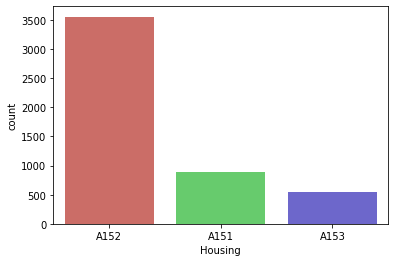

<Figure size 432x288 with 0 Axes>

In [182]:
sns.countplot(x='Housing', data=df, palette='hls')
plt.show()
plt.savefig('count_plot')

In [183]:
print(df.Housing.isnull().sum())

9


In [184]:
pd.crosstab(data.Housing.isnull(),data.Default_On_Payment)

Default_On_Payment,0,1
Housing,,
False,3497,1494
True,8,1


### Bivariate

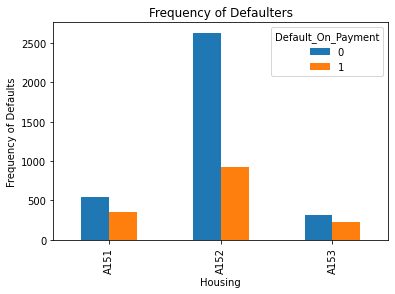

In [185]:
pd.crosstab(data.Housing, data.Default_On_Payment).plot(kind='bar')
plt.title('Frequency of Defaulters')
plt.xlabel('Housing')
plt.ylabel('Frequency of Defaults')
plt.savefig('dflt_fre_job')
plt.show()

In [186]:
df['Housing'].mode()

0    A152
dtype: object

In [187]:
df['Housing'].mode()[0]

'A152'

In [188]:
df.Housing[df.Housing=='A152'].count()

3556

In [189]:
df['Housing'].fillna(df['Housing'].mode()[0], inplace = True)

In [190]:
df.Housing[df.Housing=='A152'].count()

3565

In [191]:
df.Housing.isnull().sum()

0

In [192]:
print(df.Num_Dependents.value_counts())

1    4225
2     775
Name: Num_Dependents, dtype: int64


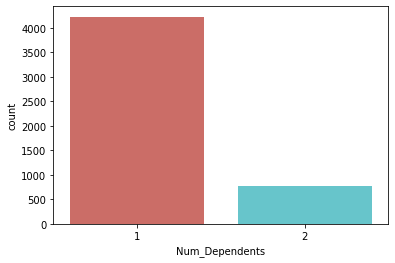

<Figure size 432x288 with 0 Axes>

In [193]:
sns.countplot(x='Num_Dependents',data=df, palette='hls')
plt.show()
plt.savefig('count_plot')

In [194]:
pd.crosstab(data.Num_Dependents,data.Default_On_Payment)

Default_On_Payment,0,1
Num_Dependents,,
1,2960,1265
2,545,230


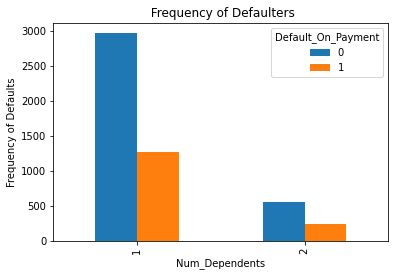

In [195]:
pd.crosstab(data.Num_Dependents,data.Default_On_Payment).plot(kind='bar')
plt.title(' Frequency of Defaulters')
plt.xlabel('Num_Dependents')
plt.ylabel('Frequency of Defaults')
plt.savefig('dflt_fre_job')
plt.show()

In [196]:
def get_Percent(col,df):
    grps=df.groupby([col,'Default_On_Payment'])
    df2 = pd.DataFrame()
    
    for name,group in grps:
        df2.loc[name[0],name[1]] = len(group)
        
    df2['Percentage 0'] = df2[0]*100 / (df2[0] + df2[1])
    df2['Percentage 1'] = df2[1]*100 / (df2[0] + df2[1])
    print(df2.sort_values(by='Percentage 1'))


In [197]:
cols = ['Num_Dependents']
for col in cols:
    get_Percent(col,df)

        0       1  Percentage 0  Percentage 1
2   545.0   230.0     70.322581     29.677419
1  2960.0  1265.0     70.059172     29.940828


In [198]:
df.shape

(5000, 17)

In [199]:
df = df.drop(['Customer_ID','Num_Dependents'],axis=1)

In [200]:
df.shape

(5000, 15)

In [201]:
df['Job_Status'].unique()

array(['A172', 'A173', nan, 'A174', 'A171'], dtype=object)

In [202]:
df['Job_Status'].describe()

count     4988
unique       4
top       A173
freq      3144
Name: Job_Status, dtype: object

In [203]:
df['Job_Status'].isnull().sum()

12

In [204]:
print(df.Job_Status.value_counts())

A173    3144
A172     997
A174     738
A171     109
Name: Job_Status, dtype: int64


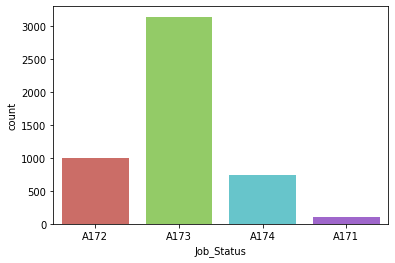

<Figure size 432x288 with 0 Axes>

In [205]:
sns.countplot(x='Job_Status',data=df, palette='hls')
plt.show()
plt.savefig('count_plot')

In [206]:
df['Job_Status'].mode()

0    A173
dtype: object

In [207]:
pd.crosstab(data.Job_Status,data.Default_On_Payment)

Default_On_Payment,0,1
Job_Status,,
A171,74,35
A172,719,278
A173,2220,924
A174,484,254


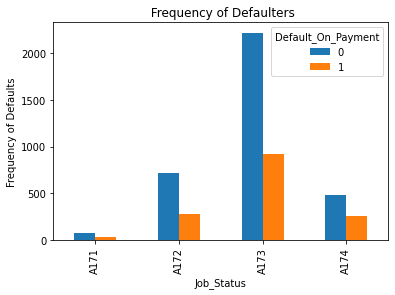

In [208]:
pd.crosstab(data.Job_Status, data.Default_On_Payment).plot(kind='bar')
plt.title(' Frequency of Defaulters')
plt.xlabel('Job_Status')
plt.ylabel('Frequency of Defaults')
plt.savefig('dflt_fre_job')
plt.show()

In [209]:
cols = ['Job_Status']
for col in cols:
    get_Percent(col, df)

           0      1  Percentage 0  Percentage 1
A172   719.0  278.0     72.116349     27.883651
A173  2220.0  924.0     70.610687     29.389313
A171    74.0   35.0     67.889908     32.110092
A174   484.0  254.0     65.582656     34.417344


In [210]:
df.Job_Status[df.Job_Status=='A174'].count()

738

In [211]:
df.Job_Status.isnull().sum()

12

In [212]:
df['Job_Status'].fillna('A174',inplace = True)

In [213]:
df.Job_Status.isnull().sum()

0

In [214]:
df.Job_Status[df.Job_Status=='A174'].count()

750

In [215]:
df.head()

,Credit_Amount,Purpose_Credit_Taken,Duration_in_Months,Status_Checking_Accnt,Credit_History,Job_Status,Years_At_Present_Employment,Marital_Status_Gender,Other_Debtors_Guarantors,Current_Address_Yrs,Age,Housing,Num_Credits,Foreign_Worker,Default_On_Payment
0,3939,P40,11,S11,A34,A172,E73,A93,A101,2,40,A152,2,A201,0
1,1795,P43,18,S12,A34,A172,E75,A92,A103,4,48,A151,2,A201,0
2,6143,P41,48,S11,A34,A172,E75,A92,A101,4,58,A153,2,A201,1
3,2675,P43,22,S14,A32,A173,E75,A93,A101,4,40,A152,1,A201,0
4,12389,P40,36,S12,A32,A174,E73,A93,A101,4,37,A153,1,A201,1


In [216]:
df.isnull().sum()

Credit_Amount                  0
Purpose_Credit_Taken           0
Duration_in_Months             0
Status_Checking_Accnt          0
Credit_History                 0
Job_Status                     0
Years_At_Present_Employment    0
Marital_Status_Gender          0
Other_Debtors_Guarantors       0
Current_Address_Yrs            0
Age                            0
Housing                        0
Num_Credits                    0
Foreign_Worker                 0
Default_On_Payment             0
dtype: int64

In [217]:
f1 = df['Job_Status']=='A171'
f2 = df['Job_Status']=='A172'
f3 = df['Job_Status']=='A173'

In [218]:
print(f2)

0        True
1        True
2        True
3       False
4       False
        ...  
4995    False
4996     True
4997    False
4998    False
4999    False
Name: Job_Status, Length: 5000, dtype: bool


In [219]:
print(df.shape)

(5000, 15)


In [220]:
df['Dummy_A171'] = np.where(f1, 1, 0)
df['Dummy_A172'] = np.where(f2, 1, 0)
df['Dummy_A173'] = np.where(f3, 1, 0)

In [221]:
print(df.shape)

(5000, 18)


In [222]:
df = df.drop(['Job_Status'],axis=1)
df

,Credit_Amount,Purpose_Credit_Taken,Duration_in_Months,Status_Checking_Accnt,Credit_History,Years_At_Present_Employment,Marital_Status_Gender,Other_Debtors_Guarantors,Current_Address_Yrs,Age,Housing,Num_Credits,Foreign_Worker,Default_On_Payment,Dummy_A171,Dummy_A172,Dummy_A173
0,3939,P40,11,S11,A34,E73,A93,A101,2,40,A152,2,A201,0,0,1,0
1,1795,P43,18,S12,A34,E75,A92,A103,4,48,A151,2,A201,0,0,1,0
2,6143,P41,48,S11,A34,E75,A92,A101,4,58,A153,2,A201,1,0,1,0
3,2675,P43,22,S14,A32,E75,A93,A101,4,40,A152,1,A201,0,0,0,1
4,12389,P40,36,S12,A32,E73,A93,A101,4,37,A153,1,A201,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,5800,P41,36,S12,A34,E73,A93,A101,4,34,A152,2,A201,0,0,0,1
4996,7228,P40,11,S14,A34,E73,A93,A101,4,39,A152,2,A201,0,0,1,0
4997,3595,P43,36,S14,A32,E75,A93,A101,2,28,A152,1,A201,0,0,0,1
4998,2622,P49,18,S12,A32,E73,A93,A101,4,34,A152,1,A201,0,0,0,1


In [72]:
cols = ['Purpose_Credit_Taken']
for col in cols:
    get_Percent(col, df)

          0      1  Percentage 0  Percentage 1
P48    40.0    5.0     88.888889     11.111111
P41   430.0   85.0     83.495146     16.504854
P43  1095.0  305.0     78.214286     21.785714
P42   615.0  290.0     67.955801     32.044199
P44    40.0   20.0     66.666667     33.333333
P49   315.0  170.0     64.948454     35.051546
P45    70.0   40.0     63.636364     36.363636
P40   725.0  445.0     61.965812     38.034188
P50    35.0   25.0     58.333333     41.666667
P46   140.0  110.0     56.000000     44.000000


In [223]:
cols = ['Purpose_Credit_Taken', 'Status_Checking_Accnt', 'Credit_History', 'Job_Status', 
        'Years_At_Present_Employment', 'Marital_Status_Gender', 'Other_Debtors_Guarantors', 'Housing', 'Foreign_Worker']
len(cols)

9

In [224]:
print(df['Purpose_Credit_Taken'].value_counts(),'\n')

P43    1400
P40    1170
P42     905
P41     515
P49     485
P46     250
P45     110
P50      60
P44      60
P48      45
Name: Purpose_Credit_Taken, dtype: int64 



In [225]:
df2 = pd.DataFrame({'Type':list('ABBC'), 'Set':list('ZZXY')})
print(df2)

  Type Set
0    A   Z
1    B   Z
2    B   X
3    C   Y


In [76]:
df2['color'] = np.where(df2['Set']=='Z', 'green', 'red')
df2

,Type,Set,color
0,A,Z,green
1,B,Z,green
2,B,X,red
3,C,Y,red


In [226]:
model_data2 = pd.DataFrame({'Type':list('ABBCDD'), 'Set':list('ZZXYWW')})
print(model_data2)

  Type Set
0    A   Z
1    B   Z
2    B   X
3    C   Y
4    D   W
5    D   W


In [227]:
f1 = model_data2['Set']=='Z'
f2 = model_data2['Set']=='Y'
f3 = model_data2['Set']=='X'

In [228]:
model_data2['color'] = np.where(np.logical_or(f1,np.logical_or(f2,f3)), 'green', 'red')
model_data2

,Type,Set,color
0,A,Z,green
1,B,Z,green
2,B,X,green
3,C,Y,green
4,D,W,red
5,D,W,red


In [229]:
model_data2['color2'] = f1 | f2 | f3
model_data2

,Type,Set,color,color2
0,A,Z,green,True
1,B,Z,green,True
2,B,X,green,True
3,C,Y,green,True
4,D,W,red,False
5,D,W,red,False


In [230]:
model_data_bkp = df
model_data_bkp.head()
model

LogisticRegression()

In [231]:
f1 = model_data_bkp['Purpose_Credit_Taken']=='P41'
f2 = model_data_bkp['Purpose_Credit_Taken']=='P43'
f3 = model_data_bkp['Purpose_Credit_Taken']=='P48'

In [232]:
model_data_bkp['Dummy_Purpose_Credit_Taken_Low'] = np.where(np.logical_or(f1, np.logical_or(f2,f3)), 1, 0)

In [233]:
print(model_data_bkp.shape)

(5000, 18)


In [234]:
data_sbst1 = model_data_bkp[['Purpose_Credit_Taken','Dummy_Purpose_Credit_Taken_Low']]
data_sbst1.head()

,Purpose_Credit_Taken,Dummy_Purpose_Credit_Taken_Low
0,P40,0
1,P43,1
2,P41,1
3,P43,1
4,P40,0


In [235]:
f1 = model_data_bkp['Purpose_Credit_Taken']=='P49'
f2 = model_data_bkp['Purpose_Credit_Taken']=='P40'
f3 = model_data_bkp['Purpose_Credit_Taken']=='P45'
f4 = model_data_bkp['Purpose_Credit_Taken']=='P50'
f5 = model_data_bkp['Purpose_Credit_Taken']=='P46'

In [236]:
model_data_bkp['Dummy_Purpose_Credit_Taken_High'] = np.where(
 np.logical_or(f1,
 np.logical_or(f2,
 np.logical_or(f3,
 np.logical_or(f4,f5)))), 1, 0)

In [237]:
model_data_bkp.head()
#print(model_data_bkp.shape)

,Credit_Amount,Purpose_Credit_Taken,Duration_in_Months,Status_Checking_Accnt,Credit_History,Years_At_Present_Employment,Marital_Status_Gender,Other_Debtors_Guarantors,Current_Address_Yrs,Age,Housing,Num_Credits,Foreign_Worker,Default_On_Payment,Dummy_A171,Dummy_A172,Dummy_A173,Dummy_Purpose_Credit_Taken_Low,Dummy_Purpose_Credit_Taken_High
0,3939,P40,11,S11,A34,E73,A93,A101,2,40,A152,2,A201,0,0,1,0,0,1
1,1795,P43,18,S12,A34,E75,A92,A103,4,48,A151,2,A201,0,0,1,0,1,0
2,6143,P41,48,S11,A34,E75,A92,A101,4,58,A153,2,A201,1,0,1,0,1,0
3,2675,P43,22,S14,A32,E75,A93,A101,4,40,A152,1,A201,0,0,0,1,1,0
4,12389,P40,36,S12,A32,E73,A93,A101,4,37,A153,1,A201,1,0,0,0,0,1


In [238]:
data_sbst2 = model_data_bkp[['Purpose_Credit_Taken', 'Dummy_Purpose_Credit_Taken_Low', 'Dummy_Purpose_Credit_Taken_High']]
data_sbst2.head()

,Purpose_Credit_Taken,Dummy_Purpose_Credit_Taken_Low,Dummy_Purpose_Credit_Taken_High
0,P40,0,1
1,P43,1,0
2,P41,1,0
3,P43,1,0
4,P40,0,1


In [239]:
model_data_bkp = model_data_bkp.drop(['Purpose_Credit_Taken'],axis=1)

In [240]:
model_data_bkp.shape

(5000, 18)

In [241]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]
# We'll divide the ages into bins such as 18-25, 26-35,36-60 and 60 and above.

In [242]:
# Understand the output - '(' means the value is included in the bin, '[' means the value is excluded
bins = [18, 25, 35, 60, 100]

In [243]:
cats = pd.cut(ages, bins)
cats

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [244]:
type(cats)

pandas.core.arrays.categorical.Categorical

In [245]:
cats[0]

Interval(18, 25, closed='right')

In [246]:
#To include the right bin value, we can do:
pd.cut(ages, bins, right=False)

[[18, 25), [18, 25), [25, 35), [25, 35), [18, 25), ..., [25, 35), [60, 100), [35, 60), [35, 60), [25, 35)]
Length: 12
Categories (4, interval[int64]): [[18, 25) < [25, 35) < [35, 60) < [60, 100)]

In [247]:
bins = [0,30,50,100]

In [248]:
ages = model_data_bkp.Age

In [249]:
pd.cut(ages, bins, right=True)

0        (30, 50]
1        (30, 50]
2       (50, 100]
3        (30, 50]
4        (30, 50]
          ...    
4995     (30, 50]
4996     (30, 50]
4997      (0, 30]
4998     (30, 50]
4999      (0, 30]
Name: Age, Length: 5000, dtype: category
Categories (3, interval[int64]): [(0, 30] < (30, 50] < (50, 100]]

In [250]:
pd.crosstab(data.Age, data.Default_On_Payment)

Default_On_Payment,0,1
Age,,
19,5,5
20,45,25
21,45,25
22,85,50
23,140,100
24,125,95
25,110,95
26,180,70
27,190,65


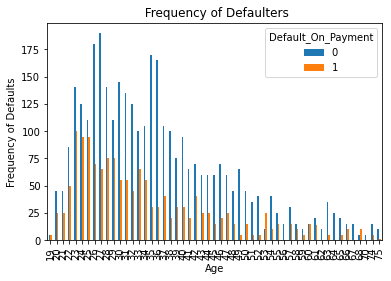

In [251]:
pd.crosstab(data.Age, data.Default_On_Payment).plot(kind='bar') 
plt.title(' Frequency of Defaulters')
plt.xlabel('Age')
plt.ylabel('Frequency of Defaults')
plt.savefig('dflt_fre_job')
plt.show()

In [252]:
ages = pd.DataFrame([81, 42, 18, 55, 23, 35], columns=['age'])
bins = [18, 30, 40, 50, 60, 70, 120]
labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70+']
ages['agerange'] = pd.cut(ages.age, bins, labels = labels, include_lowest = True)

In [253]:
ages

,age,agerange
0,81,70+
1,42,40-49
2,18,18-29
3,55,50-59
4,23,18-29
5,35,30-39


In [254]:
model_data_bkp[['Age']].head()

,Age
0,40
1,48
2,58
3,40
4,37


In [255]:
model_data_bkp2 = model_data_bkp

In [256]:
bins = [0,30,100]

In [257]:
ages = model_data_bkp.Age

In [258]:
lbls = [1,0]

In [259]:
model_data_bkp['Dummy_Age_Group'] = pd.cut(ages, labels=lbls, bins=bins)

In [260]:
model_data_bkp.head()

,Credit_Amount,Duration_in_Months,Status_Checking_Accnt,Credit_History,Years_At_Present_Employment,Marital_Status_Gender,Other_Debtors_Guarantors,Current_Address_Yrs,Age,Housing,Num_Credits,Foreign_Worker,Default_On_Payment,Dummy_A171,Dummy_A172,Dummy_A173,Dummy_Purpose_Credit_Taken_Low,Dummy_Purpose_Credit_Taken_High,Dummy_Age_Group
0,3939,11,S11,A34,E73,A93,A101,2,40,A152,2,A201,0,0,1,0,0,1,0
1,1795,18,S12,A34,E75,A92,A103,4,48,A151,2,A201,0,0,1,0,1,0,0
2,6143,48,S11,A34,E75,A92,A101,4,58,A153,2,A201,1,0,1,0,1,0,0
3,2675,22,S14,A32,E75,A93,A101,4,40,A152,1,A201,0,0,0,1,1,0,0
4,12389,36,S12,A32,E73,A93,A101,4,37,A153,1,A201,1,0,0,0,0,1,0


In [261]:
model_data_bkp[['Age','Dummy_Age_Group']].head(10)

,Age,Dummy_Age_Group
0,40,0
1,48,0
2,58,0
3,40,0
4,37,0
5,32,0
6,45,0
7,28,1
8,46,0
9,33,0


In [262]:
model_data_bkp.shape

(5000, 19)

In [263]:
model_data_bkp = model_data_bkp.drop(['Age'],axis=1)

In [264]:
model_data_bkp.shape

(5000, 18)

In [265]:
X = model_data_bkp.iloc[:,[1,2,8,10,13,14,15,16,17,]]
X

,Duration_in_Months,Status_Checking_Accnt,Housing,Foreign_Worker,Dummy_A172,Dummy_A173,Dummy_Purpose_Credit_Taken_Low,Dummy_Purpose_Credit_Taken_High,Dummy_Age_Group
0,11,S11,A152,A201,1,0,0,1,0
1,18,S12,A151,A201,1,0,1,0,0
2,48,S11,A153,A201,1,0,1,0,0
3,22,S14,A152,A201,0,1,1,0,0
4,36,S12,A153,A201,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
4995,36,S12,A152,A201,0,1,1,0,0
4996,11,S14,A152,A201,1,0,0,1,0
4997,36,S14,A152,A201,0,1,1,0,1
4998,18,S12,A152,A201,0,1,0,1,0


In [266]:
y = model_data_bkp.iloc[:,11]
y

0       0
1       0
2       1
3       0
4       1
       ..
4995    0
4996    0
4997    0
4998    0
4999    0
Name: Default_On_Payment, Length: 5000, dtype: int64

In [267]:
df2 = model_data_bkp._get_numeric_data() #drop non-numeric cols
df2.head()

,Credit_Amount,Duration_in_Months,Current_Address_Yrs,Num_Credits,Default_On_Payment,Dummy_A171,Dummy_A172,Dummy_A173,Dummy_Purpose_Credit_Taken_Low,Dummy_Purpose_Credit_Taken_High
0,3939,11,2,2,0,0,1,0,0,1
1,1795,18,4,2,0,0,1,0,1,0
2,6143,48,4,2,1,0,1,0,1,0
3,2675,22,4,1,0,0,0,1,1,0
4,12389,36,4,1,1,0,0,0,0,1


In [268]:
X = df2.loc[:, df2.columns!='Default_On_Payment'].values
X

array([[3939,   11,    2, ...,    0,    0,    1],
       [1795,   18,    4, ...,    0,    1,    0],
       [6143,   48,    4, ...,    0,    1,    0],
       ...,
       [3595,   36,    2, ...,    1,    1,    0],
       [2622,   18,    4, ...,    1,    0,    1],
       [2142,   11,    2, ...,    1,    0,    1]], dtype=int64)

In [269]:
y = df2.iloc[:, 5].values
y = y.reshape((-1, 1))

In [270]:
logit = sm.Logit(y, sm.add_constant(X))
#lg =logit.fit()
# lg.summary()

In [271]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.30, random_state=4)

In [272]:
regr = LogisticRegression()
regr.fit(x_train1, y_train1)
print(regr.intercept_)
print(regr.coef_)
pred = regr.predict(x_test1)
pred

[-1.98818985]
[[-1.53552489e-04 -1.93217552e-02 -9.66500814e-02 -5.89346106e-01
   6.28054478e+00 -2.24107680e+00 -3.84114370e+00 -9.15521367e-01
   2.32141526e-01]]


E:\anaconda\envs\tensorflow_env\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
E:\anaconda\envs\tensorflow_env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 0, 0, ..., 0, 0, 0])

In [273]:
acc = regr.score(x_test1, y_test1)
acc

1.0

In [274]:
accuracy_score(y_test1, pred)

1.0